In [1]:
from __future__ import unicode_literals, print_function, division

# System imports
import os
import sys
import argparse

# Numerics
import numpy as np
from numpy import ma
from scipy.interpolate import InterpolatedUnivariateSpline
from math import floor

# Plotting
import matplotlib.pyplot as plt
from matplotlib import scale as mscale
from matplotlib.transforms import Transform
from matplotlib.ticker import FixedLocator

# CLASS

from classy import Class

In [2]:
# Creates an instance of CLASS
cosmo = Class()
CLASS_INPUT={}
raw_cl={}

cosmo.empty()
cosmo.struct_cleanup()
CLASS_INPUT['default']={'output':'TCl'};
cosmo.set(CLASS_INPUT['default'])
#cosmo.set_default()
cosmo.compute()
raw_cl['default']=cosmo.raw_cl()
Omega0_cdm_CLASS=cosmo.Omega0_cdm()
Nur_CLASS = cosmo.Neff();
Omega0_g_CLASS=cosmo.Omega_g()
Omega0_m_CLASS=cosmo.Omega_m()
Omega0_nu_CLASS=cosmo.Omega_g()*7./8.*(4./11.)**(4./3.)*Nur_CLASS
cosmo.empty()
cosmo.struct_cleanup()

In [3]:
alpha_cdm=Omega0_cdm_CLASS*0.1/(Omega0_nu_CLASS+Omega0_g_CLASS+Omega0_m_CLASS)
alpha_Nur=Omega0_nu_CLASS*0.1/(Omega0_nu_CLASS+Omega0_g_CLASS+Omega0_m_CLASS)

In [25]:
data_sets_cdm=('extra_cdm','dsg_cdm')

CLASS_INPUT['extra_cdm']={"Omega_cdm":Omega0_cdm_CLASS*1.1,'output':'TCl'};
CLASS_INPUT['dsg_cdm']={'output':'TCl',
                        "Omega_cdm":Omega0_cdm_CLASS,
                        'dsg_c_vis2':0,
                        'nap' : 'y',
                        'dsg_c_eff2':0,
                        'dsg_alpha':alpha_cdm,
                        "dsg_log10a_vals":(','.join([str(num) for num in np.linspace(-15,1,101)])),
                        'dsg_w_vals':(','.join([str(0) for num in range(101)]))
                       }

data_sets_nur=('extra_nur','dsg_basic','dsg_nap','dsg_vis')

CLASS_INPUT['extra_nur']={"N_ur":3.3506,'output':'TCl'}
CLASS_INPUT['dsg_basic']={'output':'TCl',
                        'dsg_log10a_vals': '-15.,-14.673,-14.347,-14.02,-13.694,-13.367,-13.041,-12.714,-12.388,-12.061,-11.735,-11.408,-11.082,-10.755,-10.429,-10.102,-9.7755,-9.449,-9.1224,-8.7959,-8.4694,-8.1429,-7.8163,-7.4898,-7.1633,-6.8367,-6.5102,-6.1837,-5.8571,-5.5306,-5.2041,-4.8776,-4.551,-4.2245,-3.898,-3.5714,-3.2449,-2.9184,-2.5918,-2.2653,-1.9388,-1.6122,-1.2857,-0.95918,-0.63265,-0.30612,0.020408,0.34694,0.67347,1.',
                        'dsg_w_vals':  '0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333',
                        'dsg_alpha' : alpha_Nur
                       }
CLASS_INPUT['dsg_nap']={'output':'TCl',
                        'nap' : 'y',
                        'dsg_c_eff2':1/3,
                        'dsg_log10a_vals': '-15.,-14.673,-14.347,-14.02,-13.694,-13.367,-13.041,-12.714,-12.388,-12.061,-11.735,-11.408,-11.082,-10.755,-10.429,-10.102,-9.7755,-9.449,-9.1224,-8.7959,-8.4694,-8.1429,-7.8163,-7.4898,-7.1633,-6.8367,-6.5102,-6.1837,-5.8571,-5.5306,-5.2041,-4.8776,-4.551,-4.2245,-3.898,-3.5714,-3.2449,-2.9184,-2.5918,-2.2653,-1.9388,-1.6122,-1.2857,-0.95918,-0.63265,-0.30612,0.020408,0.34694,0.67347,1.',
                        'dsg_w_vals':  '0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333',
                        'dsg_alpha' : alpha_Nur
                       }
CLASS_INPUT['dsg_vis']={'output':'TCl',
                        'dsg_c_vis2':1/3,
                        'nap' : 'y',
                        'dsg_c_eff2':1/3,
                        'dsg_log10a_vals': '-15.,-14.673,-14.347,-14.02,-13.694,-13.367,-13.041,-12.714,-12.388,-12.061,-11.735,-11.408,-11.082,-10.755,-10.429,-10.102,-9.7755,-9.449,-9.1224,-8.7959,-8.4694,-8.1429,-7.8163,-7.4898,-7.1633,-6.8367,-6.5102,-6.1837,-5.8571,-5.5306,-5.2041,-4.8776,-4.551,-4.2245,-3.898,-3.5714,-3.2449,-2.9184,-2.5918,-2.2653,-1.9388,-1.6122,-1.2857,-0.95918,-0.63265,-0.30612,0.020408,0.34694,0.67347,1.',
                        'dsg_w_vals':  '0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333,0.333333333333333',
                        'dsg_alpha' : alpha_Nur
                       }


In [5]:
alpha_cdm

0.08450456825565504

In [26]:
for data_set in data_sets_cdm:
    cosmo.struct_cleanup()
    cosmo.empty()
    cosmo.set(CLASS_INPUT[data_set])
    cosmo.compute()
    raw_cl[data_set]=cosmo.raw_cl()

cosmo.struct_cleanup()
cosmo.empty()


for data_set in data_sets_nur:
    cosmo.struct_cleanup()
    cosmo.empty()
    cosmo.set(CLASS_INPUT[data_set])
    cosmo.compute()
    raw_cl[data_set]=cosmo.raw_cl()

cosmo.struct_cleanup()
cosmo.empty()

In [27]:
k_vals=raw_cl['default']['ell'][2:]

cl={}


cl['default']=raw_cl['default']['tt'][2:]*np.arange(2,2501)*np.arange(3,2502)/(2*np.pi)

for name in data_sets_nur:
    cl[name]=raw_cl[name]['tt'][2:]*np.arange(2,2501)*np.arange(3,2502)/(2*np.pi)
for name in data_sets_cdm:
    cl[name]=raw_cl[name]['tt'][2:]*np.arange(2,2501)*np.arange(3,2502)/(2*np.pi)

cl_ratio={}
for name in data_sets_nur:
    cl_ratio[name]=cl[name]/cl['default']-1
for name in data_sets_cdm:
    cl_ratio[name]=cl[name]/cl['default']-1
    
cl_dif_cdm=(cl['extra_cdm']-cl['dsg_cdm'])/cl['default']
cl_dif_nur=(cl['extra_nur']-cl['dsg_vis'])/cl['default']

In [8]:
cl['dsg_cdm']

array([1.43097541e-10, 1.36076094e-10, 1.28764984e-10, ...,
       8.42985298e-12, 8.40565676e-12, 8.38189028e-12])

In [9]:
cl['extra_nur']

array([1.45154605e-10, 1.37638928e-10, 1.29972210e-10, ...,
       8.65379235e-12, 8.62153523e-12, 8.58956286e-12])

In [10]:
cl['dsg_vis']

array([1.49437022e-10, 1.40850079e-10, 1.32396913e-10, ...,
       9.95705188e-12, 9.91509395e-12, 9.87308760e-12])

In [11]:
cl_dif_cdm

array([0.00240623, 0.00182279, 0.0014016 , ..., 0.00721751, 0.00710429,
       0.00698861])

In [30]:
data_PATH="/home/mmeiers/Projects/class_public/output/"
output_PATH="/home/mmeiers/Projects/class_public/MyWorkspace/Plots";

datafile_def_PATH=data_PATH+"dsg_test_def00_cl.dat"

In [34]:
datafile_def_PATH=data_PATH+"dsg_test_def00_cl.dat"
datafile_nur_PATH=data_PATH+"dsg_test_N_ur00_cl.dat"
datafile_basic_PATH=data_PATH+"dsg_test_basic00_cl.dat"
datafile_nap_PATH=data_PATH+"dsg_test_nap00_cl.dat"
datafile_vis_PATH=data_PATH+"dsg_test_vis00_cl.dat"
datafile_defclass_PATH=data_PATH+"dsg_test_def01_cl.dat"
datafile_nur_PATH2=data_PATH+"dsg_test_N_ur01_cl.dat"
datafuke_cdm=data_PATH+"dsg_test_cdm_new00_cl.dat"
datafiles=[datafile_def_PATH,datafile_nur_PATH,datafile_basic_PATH,datafile_nap_PATH,datafile_vis_PATH,datafile_defclass_PATH,datafile_nur_PATH2,datafuke_cdm]

In [35]:
data = []
for data_file in datafiles:
    data.append(np.loadtxt(data_file))

In [36]:
k_vals=data[0][:,0]
cl0_vals=data[0][:,1]
cl_nur=data[1][:,1]
cl_basic=data[2][:,1]
cl_nap=data[3][:,1]
cl_vis=data[4][:,1]
cl0class_vals=data[5][:,1]
cl_nur2=data[6][:,1]
cl_cdm=data[7][:,1]

In [37]:
cl_ratio_nur=cl_nur/cl0_vals-1
cl_ratio_basic=cl_basic/cl0_vals-1
cl_ratio_nap=cl_nap/cl0_vals-1
cl_ratio_vis=cl_vis/cl0_vals-1
cl_ratio_class=cl0class_vals/cl0_vals-1

In [42]:
cl_dif=(cl_nur-cl_vis)/cl0_vals
cl_dif2=(cl0_vals-cl_cdm)/cl0_vals

Text(0.5,1,u'Relative change of $C_\\ell$ With Extra CDM')

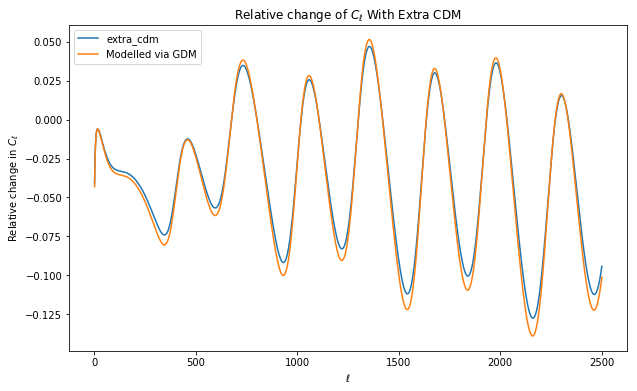

In [18]:
plt.figure(1,figsize=(10,6))
for name in data_sets_cdm:
    plt.plot(k_vals,cl_ratio[name])

plt.legend(('extra_cdm','Modelled via GDM'))
plt.xlabel('$\ell$')
plt.ylabel('Relative change in $C_\ell$')
plt.title('Relative change of $C_\ell$ With Extra CDM')

Text(0.5,1,u'Relative change of $C_\\ell$ With Extra CDM')

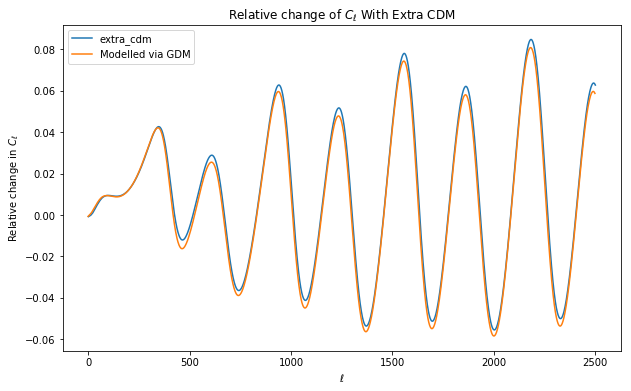

In [45]:
plt.figure(1,figsize=(10,6))
plt.plot(k_vals,cl_ratio_nur,cl_ratio_vis)

plt.legend(('extra_cdm','Modelled via GDM'))
plt.xlabel('$\ell$')
plt.ylabel('Relative change in $C_\ell$')
plt.title('Relative change of $C_\ell$ With Extra CDM')

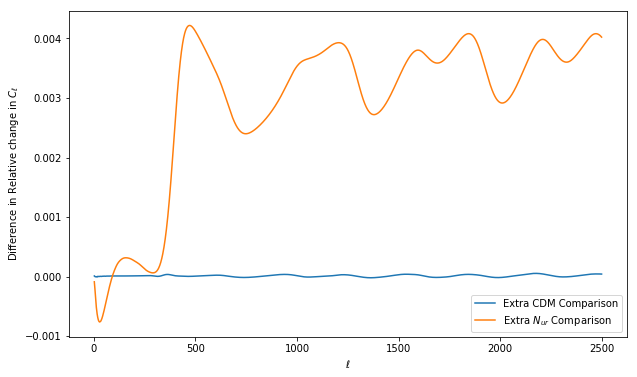

In [43]:
plt.figure(2,figsize=(10,6))
plt.plot(k_vals,cl_dif2,k_vals,cl_dif)

plt.xlabel('$\ell$')
plt.ylabel('Difference in Relative change in $C_\ell$')
plt.legend(('Extra CDM Comparison','Extra $N_{ur}$ Comparison'))


In [ ]:
cl_ratio['extra_cdm']-cl_ratio['dsg_cdm']

In [ ]:
cl_ratio['dsg_cdm']

In [ ]:
raw_cl['dsg_cdm']

In [ ]:
raw_cl['extra_cdm']

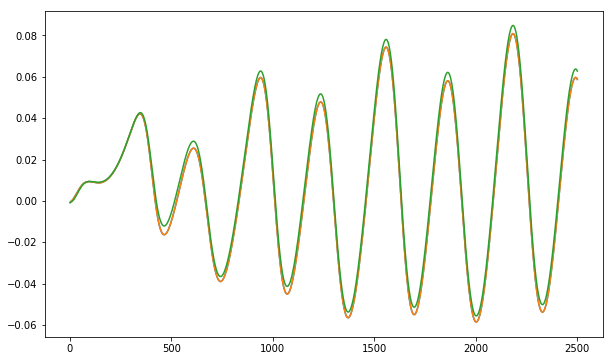

In [178]:
plt.figure(3,figsize=(10,6))
plt.plot(k_vals,cl_ratio_vis,k_vals,cl_ratio['dsg_vis'],k_vals,cl_ratio_nur)



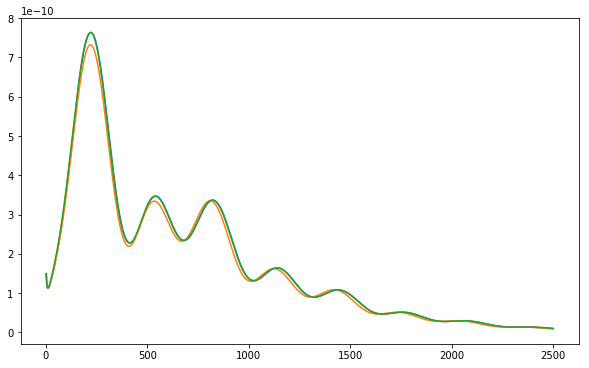

In [264]:
plt.figure(3,figsize=(10,6))
plt.plot(k_vals,cl_nur,k_vals,cl['extra_nur'],cl_nur2)


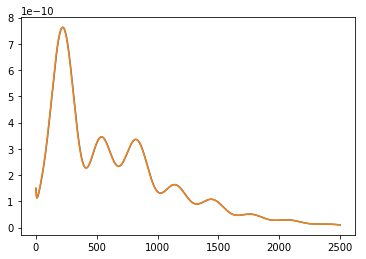

In [235]:
plt.plot(k_vals,cl['dsg_vis'],cl_vis)

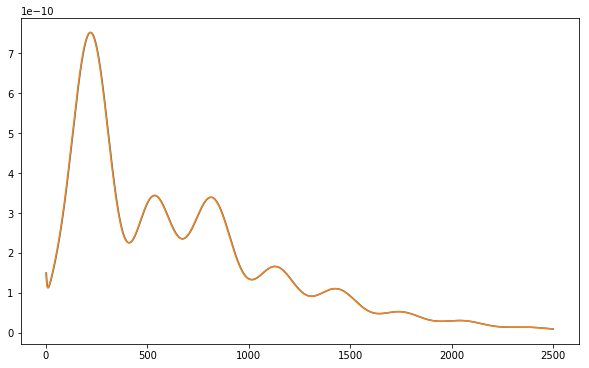

In [234]:
plt.figure(3,figsize=(10,6))
plt.plot(k_vals,cl['default'],cl0_vals)

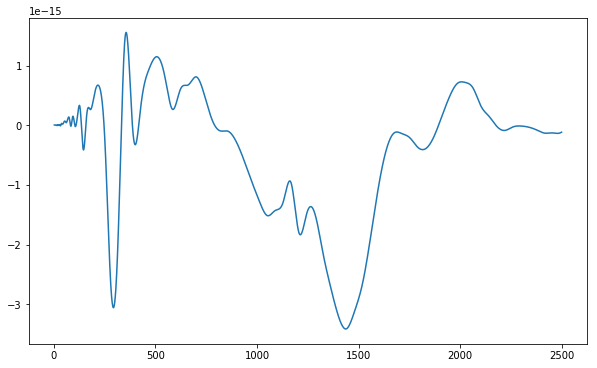

In [175]:
plt.figure(3,figsize=(10,6))
plt.plot(k_vals,cl_nur-cl['extra_nur'])

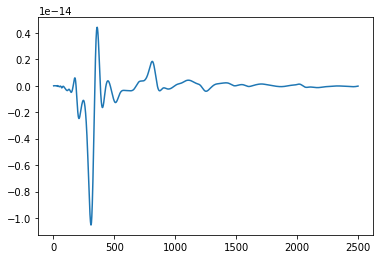

In [174]:
plt.plot(k_vals,cl['dsg_vis']-cl_vis)

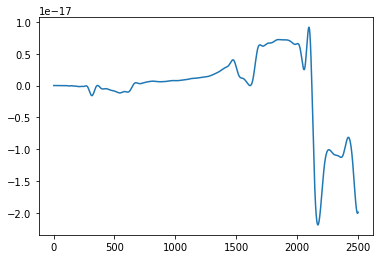

In [152]:
plt.plot(k_vals,cl['default']-cl0_vals)

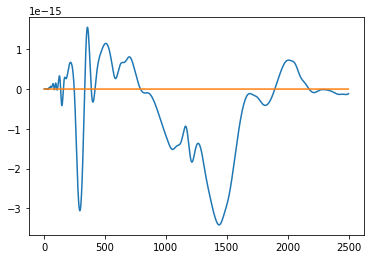

In [173]:
plt.plot(k_vals,cl_nur-cl['extra_nur'],cl_nur2-cl['extra_nur'])

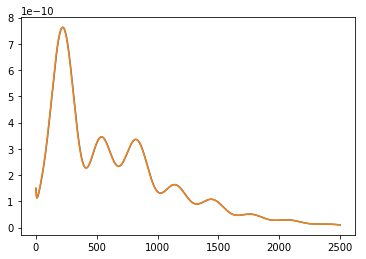

In [233]:
plt.plot(k_vals,cl['dsg_vis'],cl_vis)

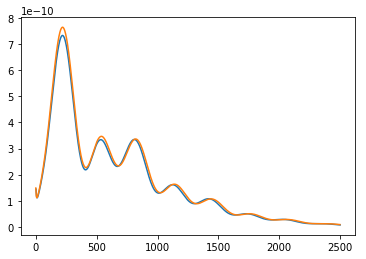

In [239]:
plt.plot(k_vals,cl['extra_nur'],cl_nur)

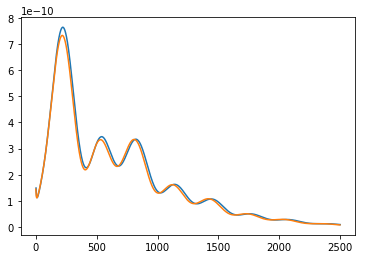

In [240]:
plt.plot(k_vals,cl['dsg_vis'],cl['extra_nur'])

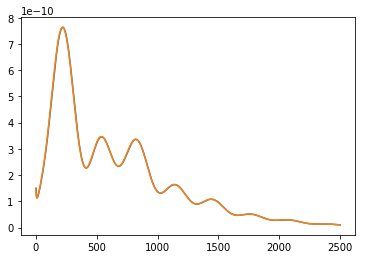

In [241]:
plt.plot(k_vals,cl_vis,cl_nur)

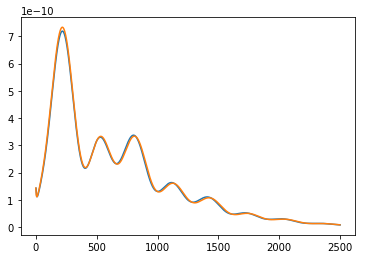

In [260]:
plt.plot(k_vals,cl['dsg_cdm'],cl['extra_cdm'])

In [29]:
cl_nur2

array([1.49424207e-10, 1.40833169e-10, 1.32375646e-10, ...,
       9.99509650e-12, 9.95294383e-12, 9.91074196e-12])

In [28]:
cl['extra_nur']

array([1.45154605e-10, 1.37638928e-10, 1.29972210e-10, ...,
       8.65379235e-12, 8.62153523e-12, 8.58956286e-12])